Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

### TAREA 1

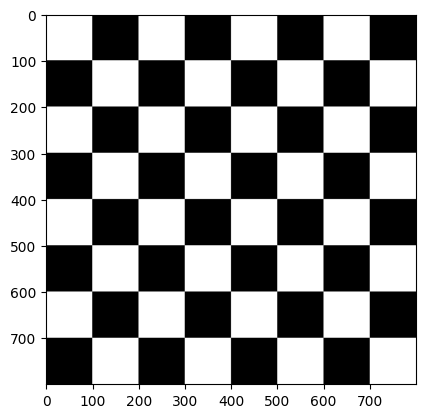

In [8]:
side = 800
black_background = np.zeros((side, side, 1), dtype=np.uint8)
for i in range(0, side, 100):
    start = 0 if i % 200 == 0 else 100
    for j in range(start, side, 200):
        black_background[i:i + 100, j:j + 100, 0] = 255
plt.imshow(black_background, cmap='gray')
plt.axis('off')
plt.show()


### TAREA 2
Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

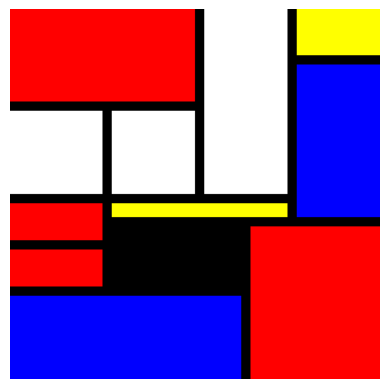

In [5]:
alto = 800
ancho = 800

mondrian = np.zeros((alto, ancho, 3), dtype=np.uint8)

mondrian[0:200, 0:400, 0] = 255
mondrian[0:400, 420:600, 0:3] = 255
mondrian[0:100, 620:, 0:2] = 255
mondrian[120:450, 620:, 2] = 255
mondrian[220:400, 0:200, 0:3] = 255
mondrian[220:400, 220:400, 0:3] = 255
mondrian[420:500, 0:200, 0] = 255
mondrian[520:600, 0:200, 0] = 255
mondrian[420:450, 220:600, 0:2] = 255
mondrian[620:800, 0:500, 2] = 255
mondrian[470:800, 520:800, 0] = 255

plt.axis('off')
plt.imshow(mondrian)
plt.show()


### TAREA 3
Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV :)

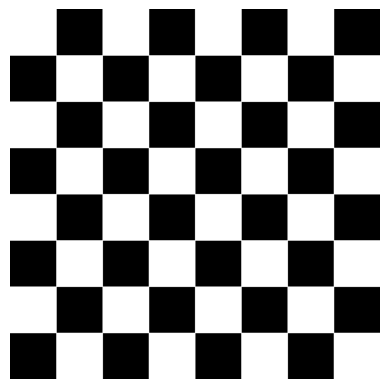

In [6]:
side = 800
black_background = np.zeros((side, side, 3), dtype=np.uint8)
for i in range(0, side, 100):
    start = 0 if i % 200 == 0 else 100
    for j in range(start, side, 200):
        cv2.rectangle(black_background, (i, j), (i + 100, j + 100), (255, 255, 255), -1)
plt.imshow(black_background, cmap='gray')
plt.axis('off')
plt.show()

### TAREA 4
TAREA: Modifica de forma libre los valores de un plano de la imagen

In [ ]:
camera_video = cv2.VideoCapture(0)
while True:
    ret, frame = camera_video.read()

    if ret:
        # Separamos canales
        b = frame[:, :, 0]
        g = frame[:, :, 1]
        r = frame[:, :, 2]
        h, w, c = frame.shape

        #Calculamos el canal blanco y negro
        b_and_w = 0.299 * b + 0.587 * g + 0.114 * r

        image = frame.copy()
        image[:, :, 0] = b_and_w
        image[:, :, 1] = b_and_w

        #Creamos una máscara que detecta los píxeles menos intensos
        not_enough_red_mask = (r / 2 < g) & (r / 1.5 < b)
        image[:, :, 2][not_enough_red_mask] = b_and_w[not_enough_red_mask]

        cv2.imshow('ESC to leave', image)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

camera_video.release()
cv2.destroyAllWindows()


### TAREA 5
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [ ]:
vid = cv2.VideoCapture(0)

while True:
    # fotograma a fotograma
    ret, frame = vid.read()

    # Hay nuevo fotograma
    if ret:
        # Convertir el fotograma a escala de grises
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Encontrar los píxeles más oscuros y más claros
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(frame_gray)

        # Dibujar un círculo en el píxel más oscuro
        cv2.circle(frame, min_loc, 10, (0, 0, 255), 2)

        # Dibujar un círculo en el píxel más claro
        cv2.circle(frame, max_loc, 10, (255, 0, 0), 2)

        # Muestra fotograma
        cv2.imshow('Vid', frame)

    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

### TAREA 6
Llevar a cabo una propuesta propia de pop art

In [4]:
camera_video = cv2.VideoCapture(0)

while True:
    # fotograma a fotograma
    ret, frame = camera_video.read()

    if ret:
        # Separamos canales
        b = frame[:, :, 0]
        g = frame[:, :, 1]
        r = frame[:, :, 2]

        h, w, c = frame.shape
        image1 = frame.copy()
        image2 = frame.copy()
        image3 = frame.copy()
        image4 = frame.copy()

        image1[:, :, 0] = b * 255
        image1[:, :, 1] = g * 255
        image1[:, :, 2] = r * 5

        image2[:, :, 0] = b * 255
        image2[:, :, 1] = g * 5
        image2[:, :, 2] = r * 255

        image3[:, :, 0] = b * 5
        image3[:, :, 1] = g * 255
        image3[:, :, 2] = r * 255

        image4[:, :, 0] = b * 5
        image4[:, :, 1] = g * 5
        image4[:, :, 2] = r * 5

        collage_up = np.hstack((image2, image1))
        collage_down = np.hstack((image3, image4))
        collage = np.vstack((collage_up, collage_down))

        cv2.circle(collage, (w, h), 20, (0, 0, 0), 8)

        cv2.imshow('ESC to leave', cv2.resize(collage, (w, h), cv2.INTER_NEAREST))

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
camera_video.release()
# Destruye ventanas
cv2.destroyAllWindows()
